In [446]:
import requests as r
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

### Gathering the data

In [447]:
# Downloading the image prediction data and save to a file
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = r.get(url,)
with open("image_prediction", "wb") as file:
    file.write(response.content)

In [448]:
# REad the image prediction file into a pandas dataframe
image = pd.read_csv('image_prediction', sep= '\t')


In [449]:
# Reading the tweet json file line by line
with open('tweet-json.txt', 'r') as file:
    lines = file.readlines()

In [450]:
# Pulling out needed data (tweet_id, retweet_count, favourite_count) from downloaded content
tweet_id = []
retweet_count = []
favorite_count = []
for line in lines:
    #print (line)
    line_dic = json.loads(line)
    tweet_id.append(line_dic['id_str'])
    retweet_count.append(line_dic["retweet_count"])
    favorite_count.append(line_dic["favorite_count"])

In [451]:
# Check if all values were pulled out correctly
print(len(tweet_id), len(retweet_count), len(favorite_count))

2354 2354 2354


In [452]:
# Creating a pandas dataframe from the extracted data
tweet_dic = {'tweet_id':tweet_id, 'retweet_count':retweet_count, 'favorite_count':favorite_count}
count = pd.DataFrame.from_dict(tweet_dic)


In [453]:
# Read the given tweet archive file into a pandas datframe
arch = pd.read_csv('twitter-archive-enhanced.csv')


### Accessment

In [454]:
# Display archive data head for visual inspection.
arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


* Programmatic accessment of the archive data

In [455]:
arch.shape

(2356, 17)

In [456]:
arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [457]:
arch.duplicated().sum()

0

In [458]:
arch.isnull().mean() * 100

tweet_id                       0.000000
in_reply_to_status_id         96.689304
in_reply_to_user_id           96.689304
timestamp                      0.000000
source                         0.000000
text                           0.000000
retweeted_status_id           92.317487
retweeted_status_user_id      92.317487
retweeted_status_timestamp    92.317487
expanded_urls                  2.504244
rating_numerator               0.000000
rating_denominator             0.000000
name                           0.000000
doggo                          0.000000
floofer                        0.000000
pupper                         0.000000
puppo                          0.000000
dtype: float64

In [459]:
arch.source[0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [460]:
arch.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [461]:
arch.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [462]:
arch.expanded_urls[0]

'https://twitter.com/dog_rates/status/892420643555336193/photo/1'

In [463]:
arch.text[675]

'This is Rizzy. She smiles a lot. 12/10 contagious af https://t.co/TU4sZogVIq'

In [464]:
arch.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [465]:
arch.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [466]:
arch.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [467]:
arch.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [468]:
dog_stage = arch[['doggo', 'pupper', 'floofer', 'puppo']]
dog_stage.head()

,doggo,pupper,floofer,puppo
0,None,None,None,None
1,None,None,None,None
2,None,None,None,None
3,None,None,None,None
4,None,None,None,None


In [469]:
# Accessing the image prediction data
image.shape

(2075, 12)

In [470]:
image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [471]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [472]:
image.duplicated().sum()

0

In [473]:
image.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [474]:
image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [475]:
# Check for image that are not dog
image[(image.p1_dog == False) & (image.p2_dog == False) & (image.p3_dog == False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


In [476]:
# Accessing the count
count.shape

(2354, 3)

In [477]:
count.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [478]:
count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [479]:
count.describe()

,retweet_count,favorite_count
count,2354.000000,2354.000000
mean,3164.797366,8080.968564
std,5284.770364,11814.771334
min,0.000000,0.000000
25%,624.500000,1415.000000
50%,1473.500000,3603.500000
75%,3652.000000,10122.250000
max,79515.000000,132810.000000


In [480]:
count.duplicated().sum()

0

In [481]:
count.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

#### Quality Issues 
* Lots of null values in certain columns in the tweet archieve dataset
* Some columns contain retweet data which are not needed in the tweet archive dataset
* Some incorrect names in the archieve name column
* Some numerator_rating are incorrect
* Multiple denominator_rating values 
* Timestamp is presented as string instead of datetime in the archive dataset
* The source column in the archieve dataset contains string of html values that should be categorical
* Extended url column a similiar string url, only diffenciated by the tweet id which is already in the dataset
* The tweet_id column in the image prediction dataset is an integer instead of a string
* The retweet count data is incomplete as two observations are missing
* Some images are not dog



#### Structural Issues on 
* Same data in four columns ie the doggo, pupper, puppo and floofer are all dog stages
* The image table has three predictions columns
* The three table should be made one



### Data Cleaning
We would clean the structural issues first

#### Structural Issues

#### Structural Issues

In [482]:
arch_cleaning = arch.copy()
count_cleaning = count.copy()
image_cleaning = image.copy()

#### Define
- Merge the doggo, puppo, floofer and pupper columns into one column called dog stage
- Drop the doggo, puppo, floofer and pupper columns

#### Code

In [483]:
arch_cleaning['dog_stage'] = arch_cleaning.doggo + ' '+ arch_cleaning.floofer + ' '+ arch_cleaning.pupper + ' '+arch_cleaning.puppo
arch_cleaning.dog_stage = arch_cleaning.dog_stage.str.replace('None', '')
arch_cleaning.dog_stage = arch_cleaning.dog_stage.str.strip()
arch_cleaning.dog_stage[arch_cleaning.dog_stage == ''] = arch_cleaning[arch_cleaning.dog_stage == ''].dog_stage.str.replace('', 'None')
arch_cleaning.dog_stage = arch_cleaning.dog_stage.str.replace('\s+','/')
arch_cleaning.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace= True)

C:\Users\osazu\AppData\Local\Temp/ipykernel_9232/2153303572.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arch_cleaning.dog_stage[arch_cleaning.dog_stage == ''] = arch_cleaning[arch_cleaning.dog_stage == ''].dog_stage.str.replace('', 'None')
C:\Users\osazu\AppData\Local\Temp/ipykernel_9232/2153303572.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  arch_cleaning.dog_stage = arch_cleaning.dog_stage.str.replace('\s+','/')


#### Test

In [484]:
arch_cleaning.dog_stage.value_counts()

None             1976
pupper            245
doggo              83
puppo              29
doggo/pupper       12
floofer             9
doggo/puppo         1
doggo/floofer       1
Name: dog_stage, dtype: int64

#### Define
* Drop all image that are not dog by selecting the once that has at least one of the three predictions to be dog

#### Code

In [485]:
image_dog = image_cleaning[(image_cleaning.p1_dog == True) | (image_cleaning.p2_dog == True) | (image_cleaning.p3_dog == True)]

#### Test

In [486]:
assert image_dog[(image_cleaning.p1_dog == False) & (image_cleaning.p2_dog == False) & (image_cleaning.p3_dog == False)].tweet_id.count() == 0

C:\Users\osazu\AppData\Local\Temp/ipykernel_9232/2626090448.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  assert image_dog[(image_cleaning.p1_dog == False) & (image_cleaning.p2_dog == False) & (image_cleaning.p3_dog == False)].tweet_id.count() == 0


#### Define
* Select the prediction that is a dog and has the highest confidence score.

#### Code

In [487]:
# Convert the dataframe to a dictionary with the heading as key and a list of the column content as values
prediction = {}
for heading in image_dog.columns:
    prediction[heading] = list(image_dog[heading]) 
    
prediction.keys()

dict_keys(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'])

We are going to select the max value between p1_conf, p2_conf and p3_conf but some of the prediction that are not dog have very high confidence score. So we define a function to convert non-dog prediction confidence score to zero.

In [488]:
def reduce_conf(dog, conf):
    """
    The function iterates through the a list of predicted dog while keeping track of the index and  check for a False values.
    For every False value (ie image is not a dog) it changes the prediction confidence to zero using the index, making it minimum.
    
    ArgumentS:
    dog - A list of boolean values for prediction dogs (True if image is a dog and False if otherwise)
    conf - A list of float values(between 0 and 1) 
    """
    index = 0
    for item in dog:
        if item == False:
            #print(index)
            #print(dog[index])
            conf[index] = 0
            #print(conf[index])
        index+=1
    

In [489]:
# Use the reduce_conf function to minimize non-dog prediction confidence
reduce_conf(prediction['p1_dog'], prediction['p1_conf'])
reduce_conf(prediction['p2_dog'], prediction['p2_conf'])
reduce_conf(prediction['p3_dog'], prediction['p3_conf'])

In [490]:
# Select the maximum prediction confidence 
index = 0
max_values_list = []
max_breed_list = []
while index < len(prediction['p1_dog']):
    p_conf_max = max(prediction['p1_conf'][index],prediction['p2_conf'][index],prediction['p3_conf'][index])
    if p_conf_max == prediction['p1_conf'][index]:
        max_breed = prediction['p1'][index]
    elif p_conf_max == prediction['p2_conf'][index]:
        max_breed = prediction['p2'][index]
    else:
        max_breed = prediction['p3'][index]
    max_values_list.append(p_conf_max)
    max_breed_list.append(max_breed)
    index+=1
     

In [491]:
# Add max prediction confidence and breed to the dictionary
prediction['max_p_conf'] = max_values_list
prediction['max_p_breed'] = max_breed_list

prediction.keys()

dict_keys(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'max_p_conf', 'max_p_breed'])

In [492]:
# Convert dictionary to a pandas dataframe
dog_breed = pd.DataFrame.from_dict(prediction)
dog_breed.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,max_p_conf,max_p_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,0.465074,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,0.506826,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,0.596461,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,0.408143,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,0.560311,miniature_pinscher


In [493]:
# Check info to ensure all value are inplace
dog_breed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tweet_id     1751 non-null   int64  
 1   jpg_url      1751 non-null   object 
 2   img_num      1751 non-null   int64  
 3   p1           1751 non-null   object 
 4   p1_conf      1751 non-null   float64
 5   p1_dog       1751 non-null   bool   
 6   p2           1751 non-null   object 
 7   p2_conf      1751 non-null   float64
 8   p2_dog       1751 non-null   bool   
 9   p3           1751 non-null   object 
 10  p3_conf      1751 non-null   float64
 11  p3_dog       1751 non-null   bool   
 12  max_p_conf   1751 non-null   float64
 13  max_p_breed  1751 non-null   object 
dtypes: bool(3), float64(4), int64(2), object(5)
memory usage: 155.7+ KB


In [494]:
dog_breed.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'max_p_conf',
       'max_p_breed'],
      dtype='object')

In [495]:
# Drop column of the three separate predictions for the prediction, prediction_dog and prediction_confidence
dog_breed.drop(columns= ['p1', 'p1_conf', 'p1_dog', 'p2','p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], inplace= True)

In [496]:
# Rename columns to remove max
dog_breed.rename(columns={
    'max_p_conf':'pre_conf',
    'max_p_breed':'pre_breed'
}, inplace=True)

#### Test

In [497]:
dog_breed.head()

,tweet_id,jpg_url,img_num,pre_conf,pre_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,0.465074,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,0.506826,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,0.596461,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,0.408143,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,0.560311,miniature_pinscher


#### Define
* Convert the tweet_id to string

#### Code

In [498]:
dog_breed.tweet_id = dog_breed.tweet_id.astype(str)
arch_cleaning.tweet_id = arch_cleaning.tweet_id.astype(str)

#### Test

In [499]:
print(type(dog_breed.tweet_id[0]))
print(type(arch_cleaning.tweet_id[0]))

<class 'str'>
<class 'str'>


#### Define
* Join the three dataframes together

#### Code

In [500]:
type(arch_cleaning.tweet_id[0])

str

In [501]:
# Merge multipl DataFrames
# source: https://data-hacks.com/merge-join-three-pandas-dataframes-python
from functools import reduce
tweet_merge = reduce(lambda left, right: pd.merge(left , right, on = ["tweet_id"], how = "outer"), [arch_cleaning, dog_breed, count_cleaning])

#### Test

In [502]:
tweet_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stage                   2356 

### Quality Issues

#### Define
Remove the retweet data

#### Code

In [503]:
 tweet_merge = tweet_merge[tweet_merge.retweeted_status_id.isnull()]

#### Test

In [504]:
assert tweet_merge.retweeted_status_id.notnull().sum() == 0

#### Define
Replace all incorrect names with none. The incorrect name begins with lowercase letters

#### Code

In [505]:
tweet_merge.name[tweet_merge.name.str.islower()] = tweet_merge[tweet_merge.name.str.islower()].name.str.replace(r'^[a-z]+', 'None', regex=True)


#### Test

In [506]:
tweet_merge.name[tweet_merge.name.str.islower()]

Series([], Name: name, dtype: object)

#### Define
- Extract numerator_rating from text and save in a new column called ext
- Convert numerator rating to float
- Select out the index for all row not equal to null
- Use the index to replace the numerator ratings with the correct values in the ext column
- Drop the ext column

#### Code

In [508]:
tweet_merge['ext'] = tweet_merge.text.str.extract(r"([0-9]+[.][0-9]+/[0-9]+)")

In [509]:
tweet_merge.ext.unique()

array([nan, '13.5/10', '9.75/10', '11.27/10', '9.5/10', '11.26/10'],
      dtype=object)

In [510]:
tweet_merge.rating_numerator = tweet_merge.rating_numerator.astype(float)

In [511]:
wrong_rating_index = list(tweet_merge[tweet_merge['ext'].isnull()==False].index)
for i in wrong_rating_index:
    tweet_merge.rating_numerator[i] = float(tweet_merge.ext[i][:-3])

C:\Users\osazu\AppData\Local\Temp/ipykernel_9232/3947881564.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_merge.rating_numerator[i] = float(tweet_merge.ext[i][:-3])


In [512]:
tweet_merge.drop(columns= 'ext', inplace= True)

#### Test

In [513]:
for i in wrong_rating_index:
    print(tweet_merge.rating_numerator[i])

13.5
9.75
11.27
9.5
11.26


#### Drop columns with large amount of null values

#### Code

In [514]:
tweet_merge.isnull().mean() * 100

tweet_id                        0.000000
in_reply_to_status_id          96.413793
in_reply_to_user_id            96.413793
timestamp                       0.000000
source                          0.000000
text                            0.000000
retweeted_status_id           100.000000
retweeted_status_user_id      100.000000
retweeted_status_timestamp    100.000000
expanded_urls                   2.666667
rating_numerator                0.000000
rating_denominator              0.000000
name                            0.000000
dog_stage                       0.000000
jpg_url                        22.482759
img_num                        22.482759
pre_conf                       22.482759
pre_breed                      22.482759
retweet_count                   0.000000
favorite_count                  0.000000
dtype: float64

In [515]:
# columns to drop are in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp 
tweet_merge.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace= True)

#### Test

In [516]:
removed = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
for item in removed:
    assert item not in tweet_merge.columns

#### Define

- We would remove all rows that has any denominator rating other than 10
- We would drop the denominator rating column as it's no longer useful
- Rename numerator_rating to rating

#### Code

In [517]:
tweet_merge = tweet_merge[tweet_merge.rating_denominator == 10]

In [518]:
# since all the values in this column is 10, we no longer need the column
tweet_merge.drop(columns= 'rating_denominator', inplace= True)

In [519]:
# The numerator_rating is the only rating we have so we rename to rating
tweet_merge.rename(columns= {'rating_numerator': 'rating'}, inplace= True)

#### Test

In [520]:
assert 'rating_denominator' not in tweet_merge.columns

#### Define
convert timestamp to datetime

#### Code

In [521]:
tweet_merge.timestamp = pd.to_datetime(tweet_merge.timestamp)

#### Test

In [522]:
tweet_merge.timestamp.dtype

datetime64[ns, UTC]

#### Define
Categorize the source column data

In [523]:
tweet_merge.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

#### Code

In [524]:
cat_map = {
    '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':'iPhone',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>': 'Web Client',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':'Vine',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>':'TweetDeck'
}
tweet_merge.source = tweet_merge.source.map(cat_map)

In [525]:
tweet_merge.source.unique()

array(['iPhone', 'Web Client', 'Vine', 'TweetDeck'], dtype=object)

In [526]:
tweet_merge.source = tweet_merge.source.astype("category")

#### Test

In [527]:
tweet_merge.source.unique()

['iPhone', 'Web Client', 'Vine', 'TweetDeck']
Categories (4, object): ['TweetDeck', 'Vine', 'Web Client', 'iPhone']

#### Define
Drop the extended url column

#### Code

In [528]:
tweet_merge.drop(columns= 'expanded_urls', inplace= True)

#### Test

In [529]:
assert 'expanded_urls' not in tweet_merge.columns

#### Define
* convert the tweet id for the image dataframe to string

#### Code

In [530]:
tweet_merge.tweet_id = tweet_merge.tweet_id.astype(str)

#### Test

In [531]:
tweet_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        2153 non-null   object             
 1   timestamp       2153 non-null   datetime64[ns, UTC]
 2   source          2153 non-null   category           
 3   text            2153 non-null   object             
 4   rating          2153 non-null   float64            
 5   name            2153 non-null   object             
 6   dog_stage       2153 non-null   object             
 7   jpg_url         1669 non-null   object             
 8   img_num         1669 non-null   float64            
 9   pre_conf        1669 non-null   float64            
 10  pre_breed       1669 non-null   object             
 11  retweet_count   2153 non-null   float64            
 12  favorite_count  2153 non-null   float64            
dtypes: category(1), datetime64[ns, UT

#### Define
* Drop rows with non dog images

#### Code

In [532]:
# The tweets with non dog images have non values for jpg_url, img_num, pre_conf and pre_breed. These are the only null values left
tweet_merge.dropna(inplace= True)

#### Test

In [533]:
tweet_merge.isnull().sum()

tweet_id          0
timestamp         0
source            0
text              0
rating            0
name              0
dog_stage         0
jpg_url           0
img_num           0
pre_conf          0
pre_breed         0
retweet_count     0
favorite_count    0
dtype: int64

### Storing the data

In [535]:
tweet_merge.to_csv('twitter_archive_master.csv')

### Analysis and Visualization

In [536]:
tweet_merge.head()

,tweet_id,timestamp,source,text,rating,name,dog_stage,jpg_url,img_num,pre_conf,pre_breed,retweet_count,favorite_count
1,892177421306343426,2017-08-01 00:17:27+00:00,iPhone,This is Tilly. She's just checking pup on you....,13.0,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,0.323581,Chihuahua,6514.0,33819.0
2,891815181378084864,2017-07-31 00:18:03+00:00,iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,0.716012,Chihuahua,4328.0,25461.0
3,891689557279858688,2017-07-30 15:58:51+00:00,iPhone,This is Darla. She commenced a snooze mid meal...,13.0,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,0.168086,Labrador_retriever,8964.0,42908.0
4,891327558926688256,2017-07-29 16:00:24+00:00,iPhone,This is Franklin. He would like you to stop ca...,12.0,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,0.555712,basset,9774.0,41048.0
5,891087950875897856,2017-07-29 00:08:17+00:00,iPhone,Here we have a majestic great white breaching ...,13.0,None,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,0.425595,Chesapeake_Bay_retriever,3261.0,20562.0


#### Most common rating

[Text(0.5, 1.0, 'Frequency Plot of Dog Rating')]

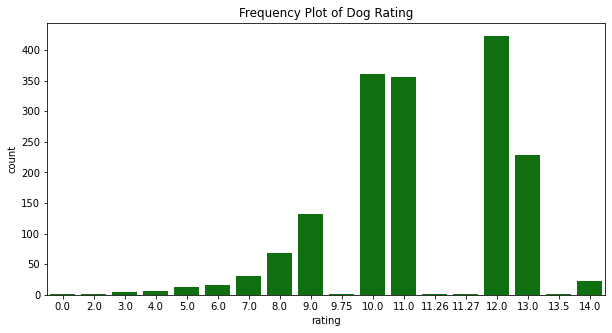

In [537]:
plt.figure(figsize= (10,5))
sns.countplot(data= tweet_merge, x= 'rating', color = 'g').set(title = 'Frequency Plot of Dog Rating')

The most frequent rating is 12, next to it is 10, which is closely followed by 11.

### The average dog rating

In [538]:
tweet_merge.rating.mean()

10.838693828639903

[Text(0.5, 1.0, 'Plot showing Rating distribution')]

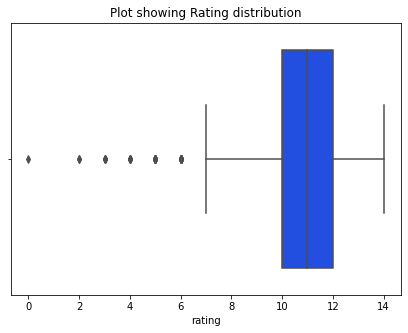

In [556]:
plt.figure(figsize= (7,5))
sns.boxplot(data= tweet_merge, x = 'rating').set(title = 'Plot showing Rating distribution')

The average rating of dogs was 11, the most frequent rating is 29 and most rating lies in the range of 10 - 12

#### Most common source

[Text(0.5, 1.0, 'Frequency plot of Source')]

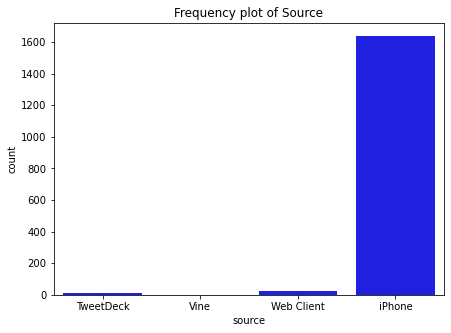

In [557]:
plt.figure(figsize= (7,5))
sns.countplot(data= tweet_merge, x= 'source', color = 'b').set(title = 'Frequency plot of Source')

iPhone is bar far the most common source

#### The top 5 retweet and favorite count

In [558]:
top_retweet = tweet_merge.nlargest(n = 5, columns= 'retweet_count')
top_retweet

,tweet_id,timestamp,source,text,rating,name,dog_stage,jpg_url,img_num,pre_conf,pre_breed,retweet_count,favorite_count
1039,744234799360020481,2016-06-18 18:26:18+00:00,iPhone,Here's a doggo realizing you can stand in a po...,13.0,None,doggo,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1.0,0.825333,Labrador_retriever,79515.0,131075.0
534,807106840509214720,2016-12-09 06:17:20+00:00,iPhone,This is Stephan. He just wants to help. 13/10 ...,13.0,Stephan,None,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1.0,0.505370,Chihuahua,56625.0,107015.0
1079,739238157791694849,2016-06-04 23:31:25+00:00,iPhone,Here's a doggo blowing bubbles. It's downright...,13.0,None,doggo,https://pbs.twimg.com/ext_tw_video_thumb/73923...,1.0,0.503372,Eskimo_dog,52360.0,75163.0
413,822872901745569793,2017-01-21 18:26:02+00:00,iPhone,Here's a super supportive puppo participating ...,13.0,None,puppo,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1.0,0.196015,Lakeland_terrier,48265.0,132810.0
66,879415818425184262,2017-06-26 19:07:24+00:00,iPhone,This is Duddles. He did an attempt. 13/10 some...,13.0,Duddles,None,https://pbs.twimg.com/ext_tw_video_thumb/87941...,1.0,0.383404,English_springer,45849.0,107956.0


[Text(0.5, 1.0, 'Tweets with Highest Retweets')]

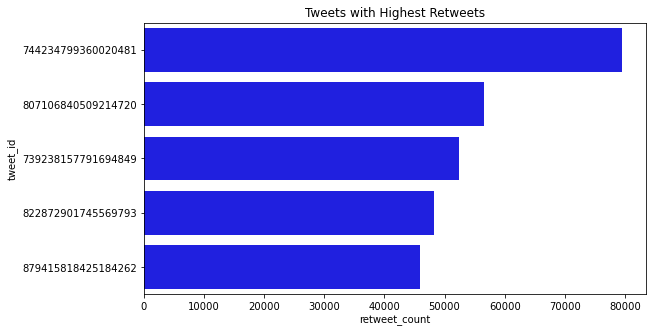

In [559]:
plt.figure(figsize = (9, 5))
sns.barplot(data= top_retweet, y = 'tweet_id', x = 'retweet_count', color = 'b').set(title = 'Tweets with Highest Retweets')

In [561]:
top_favorite = tweet_merge.nlargest(n = 5, columns= 'favorite_count')
top_favorite

,tweet_id,timestamp,source,text,rating,name,dog_stage,jpg_url,img_num,pre_conf,pre_breed,retweet_count,favorite_count
413,822872901745569793,2017-01-21 18:26:02+00:00,iPhone,Here's a super supportive puppo participating ...,13.0,None,puppo,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1.0,0.196015,Lakeland_terrier,48265.0,132810.0
1039,744234799360020481,2016-06-18 18:26:18+00:00,iPhone,Here's a doggo realizing you can stand in a po...,13.0,None,doggo,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1.0,0.825333,Labrador_retriever,79515.0,131075.0
66,879415818425184262,2017-06-26 19:07:24+00:00,iPhone,This is Duddles. He did an attempt. 13/10 some...,13.0,Duddles,None,https://pbs.twimg.com/ext_tw_video_thumb/87941...,1.0,0.383404,English_springer,45849.0,107956.0
534,807106840509214720,2016-12-09 06:17:20+00:00,iPhone,This is Stephan. He just wants to help. 13/10 ...,13.0,Stephan,None,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1.0,0.505370,Chihuahua,56625.0,107015.0
135,866450705531457537,2017-05-22 00:28:40+00:00,iPhone,This is Jamesy. He gives a kiss to every other...,13.0,Jamesy,pupper,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,2.0,0.905334,French_bulldog,32883.0,106827.0


[Text(0.5, 1.0, 'Tweets with Highest Likes')]

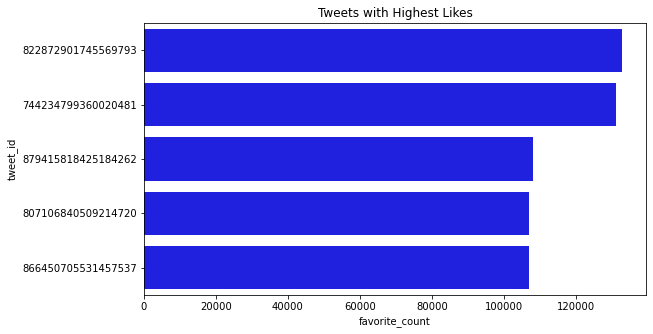

In [562]:
plt.figure(figsize = (9, 5))
sns.set_palette('bright')
sns.barplot(data= top_favorite, y = 'tweet_id', x= 'favorite_count', color= 'b',  ).set(title= 'Tweets with Highest Likes')

#### The relationship between retweet count and favorite count

[Text(0.5, 1.0, 'Retweet count vs Favorite count')]

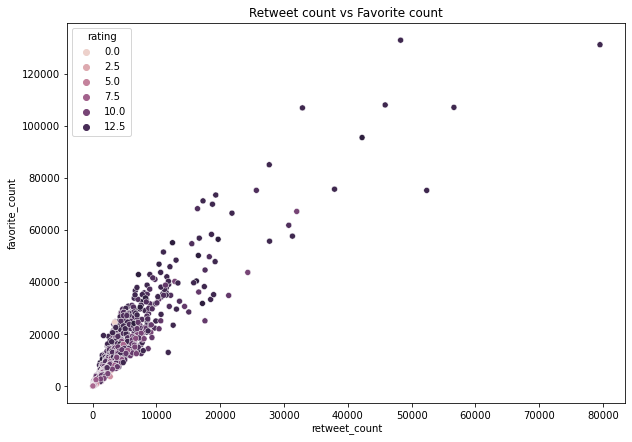

In [563]:
plt.figure(figsize = (10, 7))
sns.scatterplot(data= tweet_merge , x = 'retweet_count', y = 'favorite_count', hue = 'rating').set(title = 'Retweet count vs Favorite count')

The chart shows an obvious strong relationship between the retweet count and favorite count.

#### When was the highest retweet engagement

[Text(0.5, 1.0, 'WeRateDog Retweet Engagement over Time')]

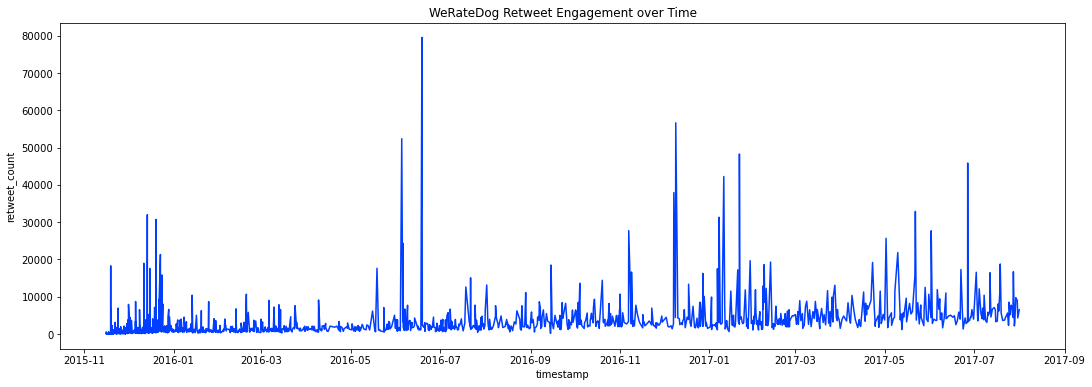

In [564]:
plt.figure(figsize = (18, 6))
sns.lineplot(data= tweet_merge, x = 'timestamp', y= 'retweet_count').set(title = 'WeRateDog Retweet Engagement over Time')

The twitter account had the most retweet engagement in late June 2016

#### Top 10 predicted breeds

In [549]:
tweet_merge.pre_breed.value_counts().head(10)

golden_retriever      154
Labrador_retriever    105
Pembroke               95
Chihuahua              90
pug                    62
toy_poodle             51
chow                   47
Pomeranian             42
Samoyed                42
malamute               33
Name: pre_breed, dtype: int64

[Text(0.5, 1.0, 'Top predicted dog breeds')]

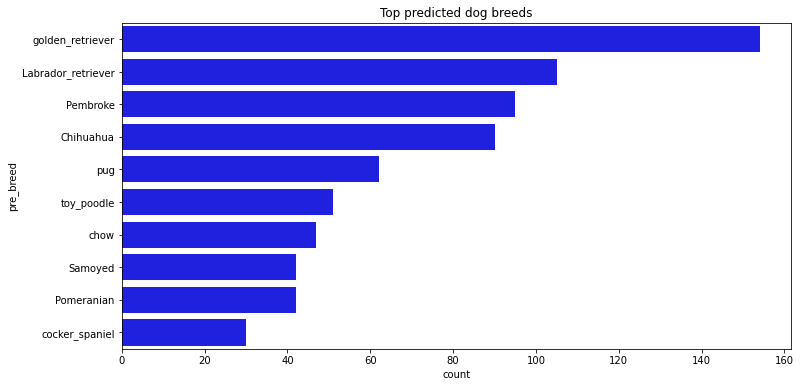

In [550]:
plt.figure(figsize = (12, 6))
sns.countplot(data= tweet_merge, y = 'pre_breed', order = dog_breed.pre_breed.value_counts().iloc[:10].index, color = 'b').set(title = 'Top predicted dog breeds')

The neural network predicted most of the dogs to be of the golden retriever.

[Text(0.5, 1.0, 'Rating Distribution of Top 10 predicted')]

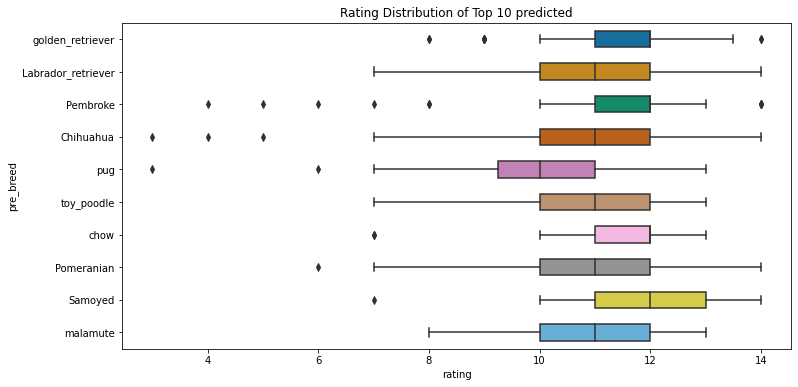

In [551]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'pre_breed', x = 'rating',
                    data = pl_df,
                    orient = 'h',
                    width = 0.5,
                    palette = "colorblind",
                    order = pl_df.pre_breed.value_counts().iloc[:10].index).set(title = 'Rating Distribution of Top 10 predicted')

In [552]:
fav_breed = tweet_merge.groupby('pre_breed').mean()
fav_breed.head()

,rating,img_num,pre_conf,retweet_count,favorite_count
pre_breed,,,,,
Afghan_hound,9.666667,1.000000,0.433959,5976.0000,17326.666667
Airedale,9.833333,1.166667,0.583771,1393.7500,5280.833333
American_Staffordshire_terrier,10.312500,1.187500,0.527359,2310.8125,9380.187500
Appenzeller,11.000000,1.000000,0.503665,1458.0000,7317.500000
Australian_terrier,11.500000,2.000000,0.307584,3078.5000,11127.500000


In [553]:
top10_fav = fav_breed.nlargest(10, 'favorite_count')
top10_fav

,rating,img_num,pre_conf,retweet_count,favorite_count
pre_breed,,,,,
Saluki,12.500000,1.000000,0.523054,5133.750000,24060.000000
Bedlington_terrier,10.333333,1.000000,0.286043,7510.166667,21153.166667
French_bulldog,11.193548,1.161290,0.662573,5039.677419,18416.806452
Bouvier_des_Flandres,13.000000,1.000000,0.082610,4479.000000,18032.000000
Afghan_hound,9.666667,1.000000,0.433959,5976.000000,17326.666667
black-and-tan_coonhound,10.500000,2.500000,0.692000,4164.500000,17012.000000
flat-coated_retriever,10.875000,1.125000,0.664417,4520.250000,16791.625000
Irish_water_spaniel,11.333333,1.000000,0.413869,4500.666667,16400.000000
Leonberg,11.333333,1.666667,0.681635,3863.666667,14934.333333


[Text(0.5, 1.0, 'Top 10 average favorite count against dog breed')]

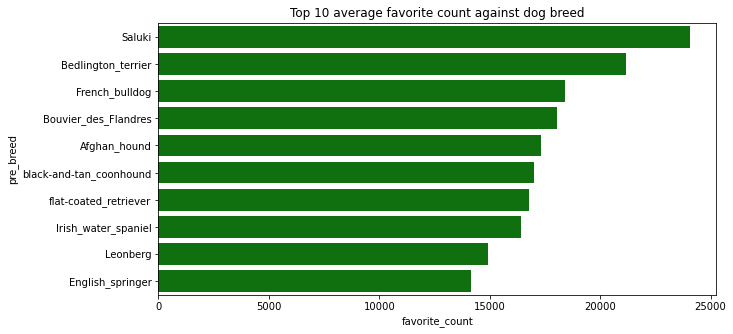

In [554]:
plt.figure(figsize = (10, 5))
sns.barplot(data=top10_fav, x = 'favorite_count', y = top10_fav.index, color= 'g').set(title = 'Top 10 average favorite count against dog breed')

In [575]:
tweet_merge.to_csv('pl1_tweet_merge.csv')
top_favorite.to_csv('pl3_top_favorite.csv')
top10_fav.to_csv('top10_fav.csv')